In [5]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carregando o dataset
df_bebes = pd.read_csv('../data/bebes.csv', delimiter=',')

# Padronizando dados de comprimento dos bebes
df_bebes['zcomprimento'] = zscore(df_bebes['comprimento'])

df_bebes['zcomprimento'].describe()

count    7.400000e+01
mean    -2.655533e-16
std      1.006826e+00
min     -2.743512e+00
25%     -8.187557e-01
50%      2.724881e-01
75%      6.960990e-01
max      1.622246e+00
Name: zcomprimento, dtype: float64

*Padronização:* 
 - Média = zero 
 - Desvio Padrão = 1

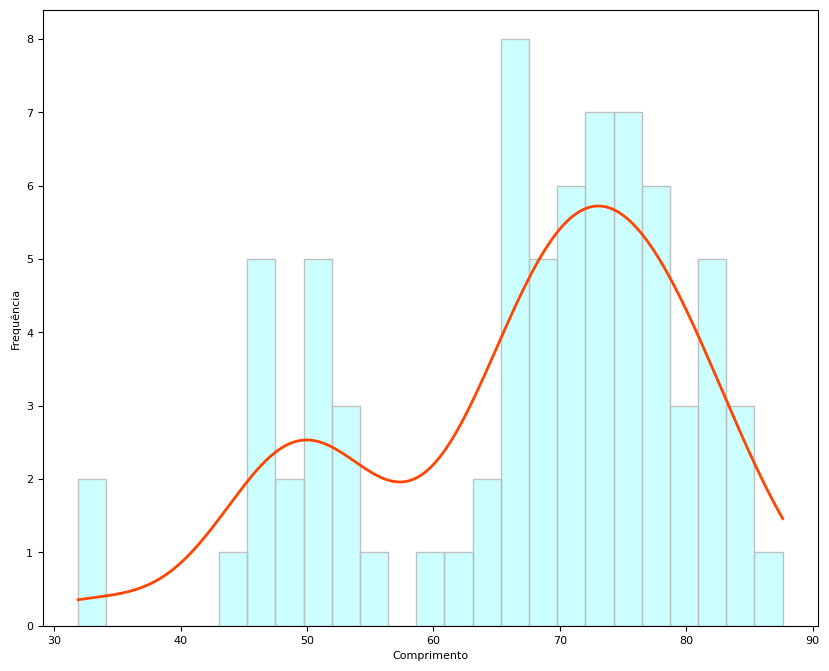

In [8]:
# Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,8))
hist1 = sns.histplot(data=df_bebes.comprimento, kde=True, bins=25,
                     color = 'aqua', alpha=0.2, edgecolor='silver',
                     line_kws={'linewidth': 2})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Comprimento', fontsize=8)
plt.ylabel('Frequência', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

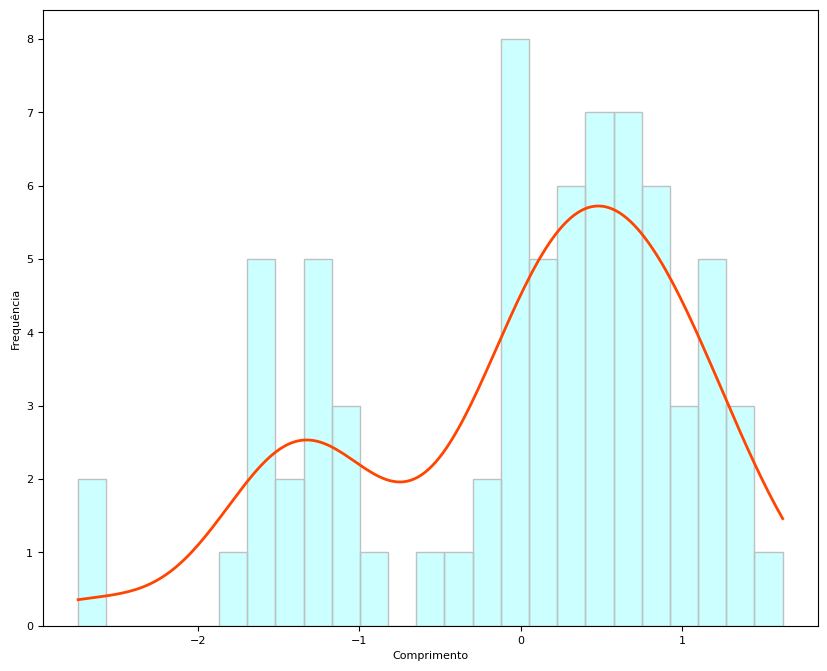

In [9]:
# Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,8))
hist1 = sns.histplot(data=df_bebes.zcomprimento, kde=True, bins=25,
                     color = 'aqua', alpha=0.2, edgecolor='silver',
                     line_kws={'linewidth': 2})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Comprimento', fontsize=8)
plt.ylabel('Frequência', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [10]:
from statstests.tests import shapiro_francia

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(df_bebes.comprimento) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade pois o valor do p-value é maior do que 0,05')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05')

method  :  Shapiro-Francia normality test
statistics W  :  0.9242393179099305
statistics z  :  3.2661109119327003
p-value  :  0.0005451776708206652
Statistics W=0.92424, p-value=0.000545
Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05


In [11]:
from statstests.tests import shapiro_francia

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(df_bebes.zcomprimento) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade pois o valor do p-value é maior do que 0,05')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05')

method  :  Shapiro-Francia normality test
statistics W  :  0.9242393179099307
statistics z  :  3.266110911932695
p-value  :  0.0005451776708206756
Statistics W=0.92424, p-value=0.000545
Rejeita-se H0 - Distribuição não aderente à normalidade pois o valor do p-value é menor do que 0,05


*A Padronização basicamente diminui a amplitudo dos dados, entretanto, ela não altera a normalização, ou seja, aplicando-se a padronização se a distribuição não tiver aderência a normalidade, continuará não tendo, o intuito de se padronizar os dados é deixá-los na mesma escala!!!!*



### Padronização **NÃO** altera a distribuição!!!!! 